# Описание датасета

Рак молочной железы является наиболее распространенным видом рака среди женщин в мире. На его долю приходится 25% всех случаев рака, и только в 2015 году от него пострадало более 2,1 миллиона человек. Клетки образуют опухоли, которые можно увидеть на рентгеновском снимке или прощупать в виде уплотнений в области молочной железы.

Основные проблемы, связанные с его обнаружением, заключаются в том, как классифицировать опухоли на злокачественные (раковые) или доброкачественные (не раковые).

Ссылка на датасет: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

1. id: уникальный идентификатор.
2. diagnosis: M - злокачественная B - доброкачественная (целевой признак). 
3. radius_mean: радиус долей. 
4. texture_mean: среднее значение текстуры поверхности.
5. perimeter_mean: внешний периметр долей.
6. area_mean: средняя площадь долей.
7. smoothness_mean: среднее значение уровней гладкости.
8. compactness_mean: среднее значение компактности.
9. concavity_mean: среднее значение вогнутости.
10. concave points_mean: среднее значение вогнутых точек.
11. symmetry_mean: среднее значение симметрии.
12. fractal_dimension_mean: среднее значение фрактальной размерности.

Использовать будем только вышеперечисленные столбцы.

# Импорт библиотек

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
%matplotlib inline 
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных

In [87]:
#first_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
first_data = pd.read_csv('datasets/breast-cancer.csv')

In [88]:
# Удалим дубликаты записей, если они присутствуют
data = first_data.drop_duplicates()
# Также удалим ненужный столбец-идентификатор
data = data.drop(columns=['id'], axis=1)
# Оставим только медианные значения
data = data.loc[:, 'diagnosis':'fractal_dimension_mean']

# Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

Основные характеристики датасета

In [89]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  
0         0.2419                 0.07871  
1         0.1812                 0.05667  
2         0.2069                 0.05999  
3         0.2597                 0.09744  
4         0.1809                 0.05883

In [90]:
data.shape

(569, 11)

In [91]:
# Список колонок
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [92]:
# Список колонок с типами данных 
data.dtypes

diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

In [93]:
# Проверим наличие пустых значений
data.isnull().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

# Построение графиков для понимания структуры данных

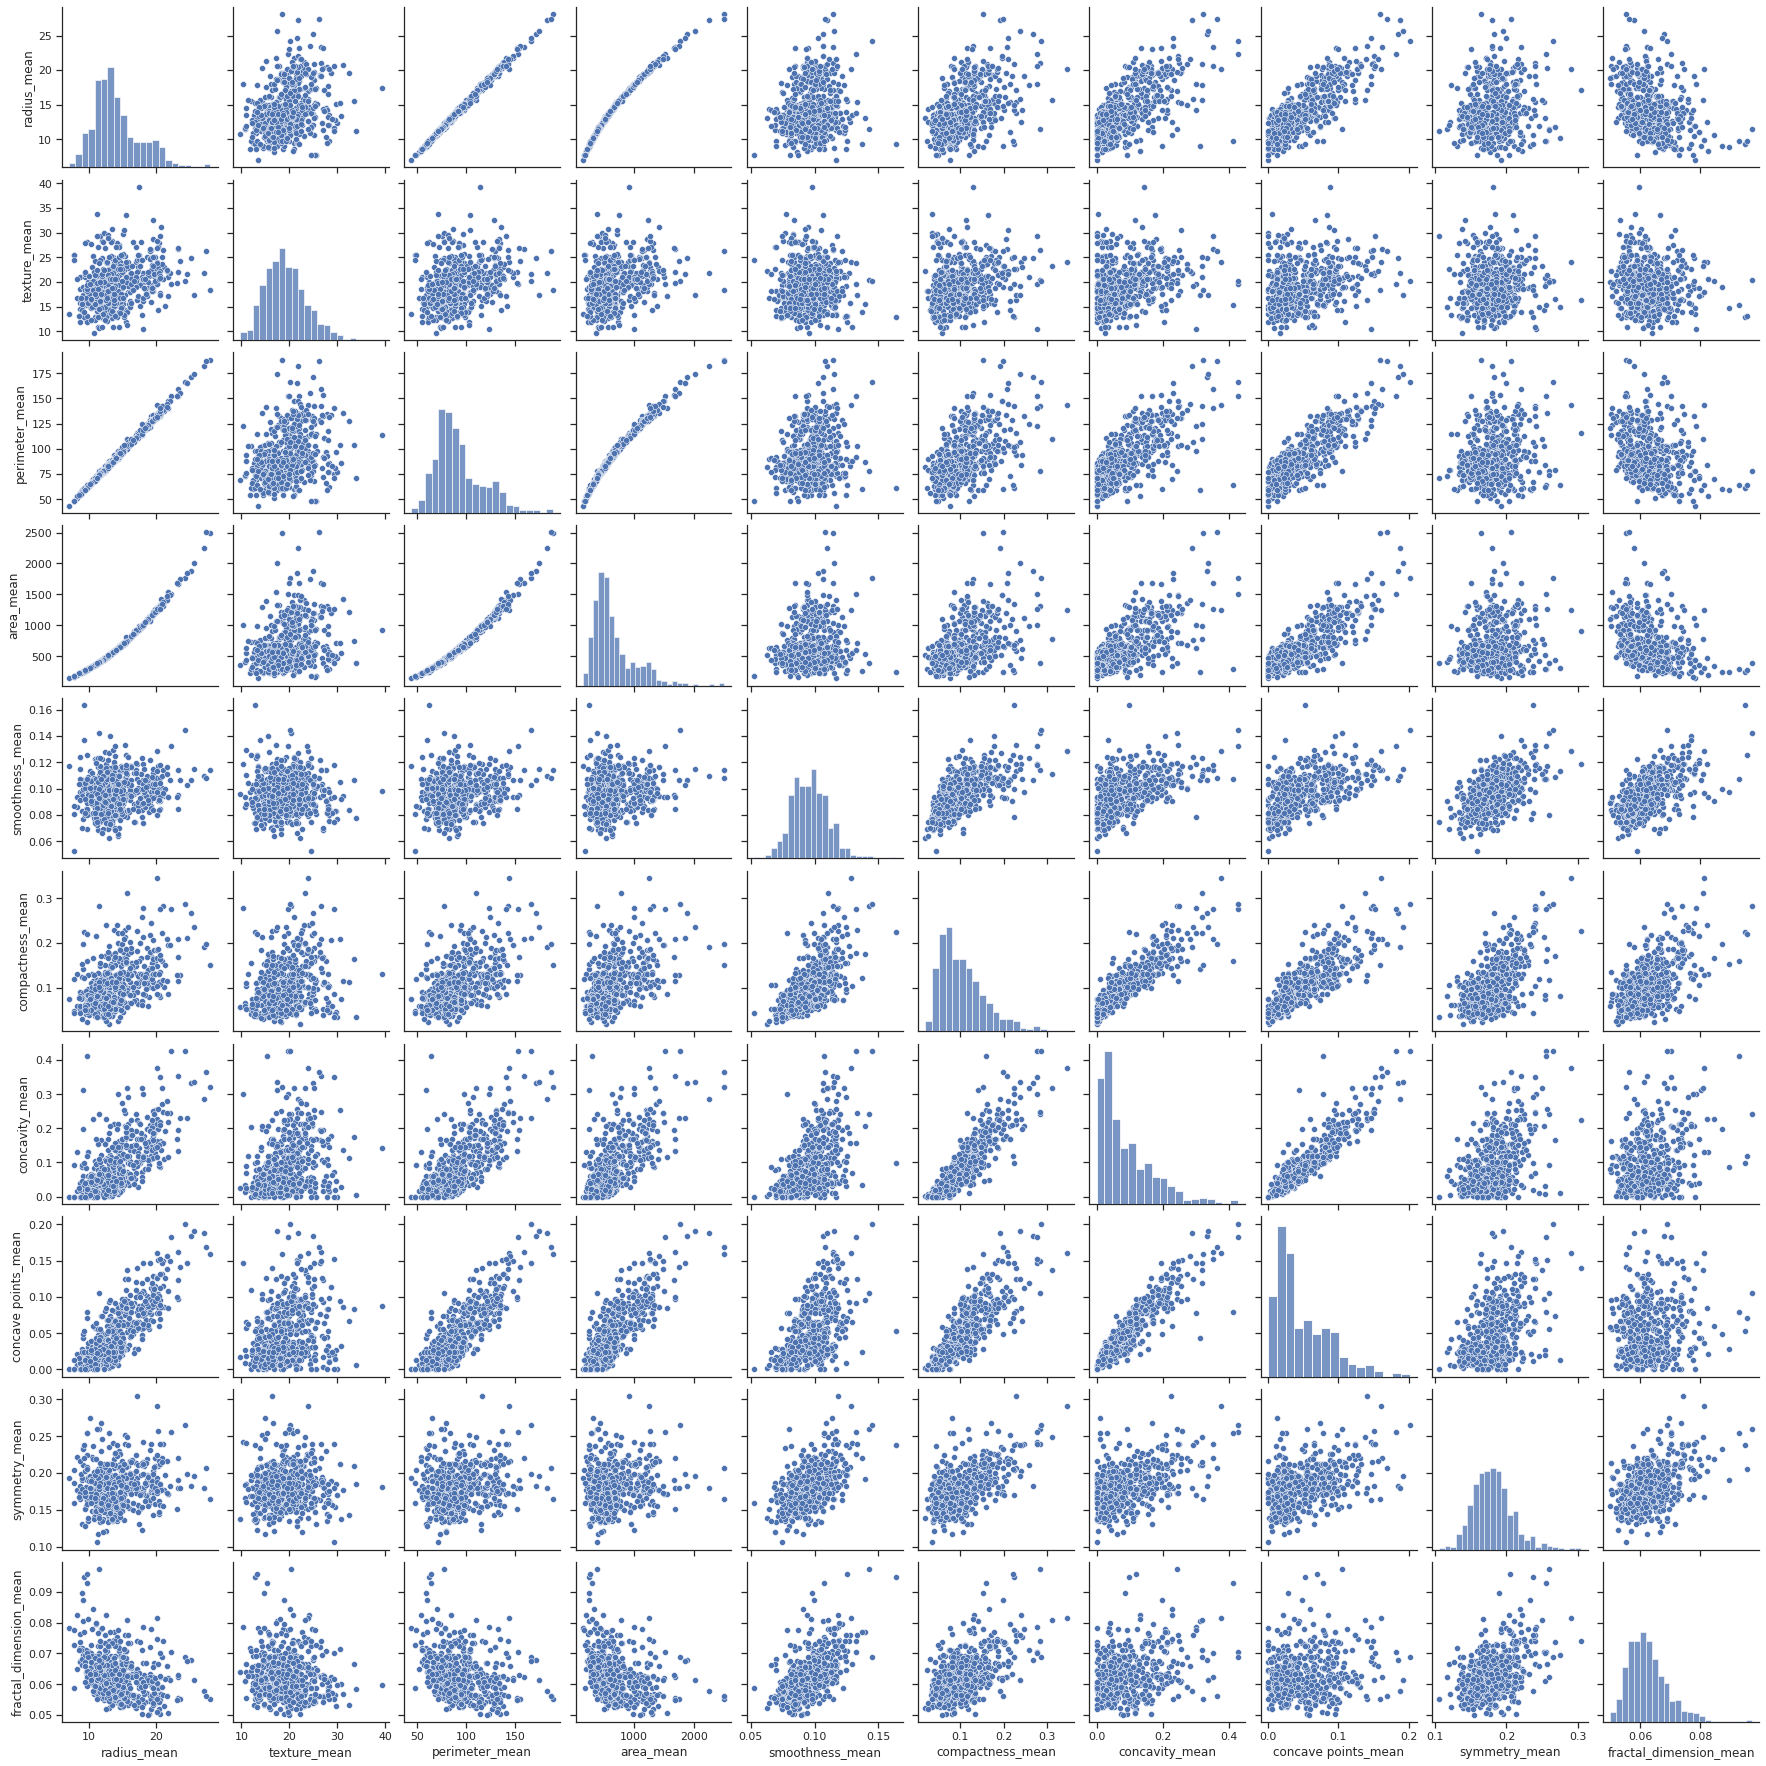

In [94]:
# Парные диаграммы
sns.pairplot(data)

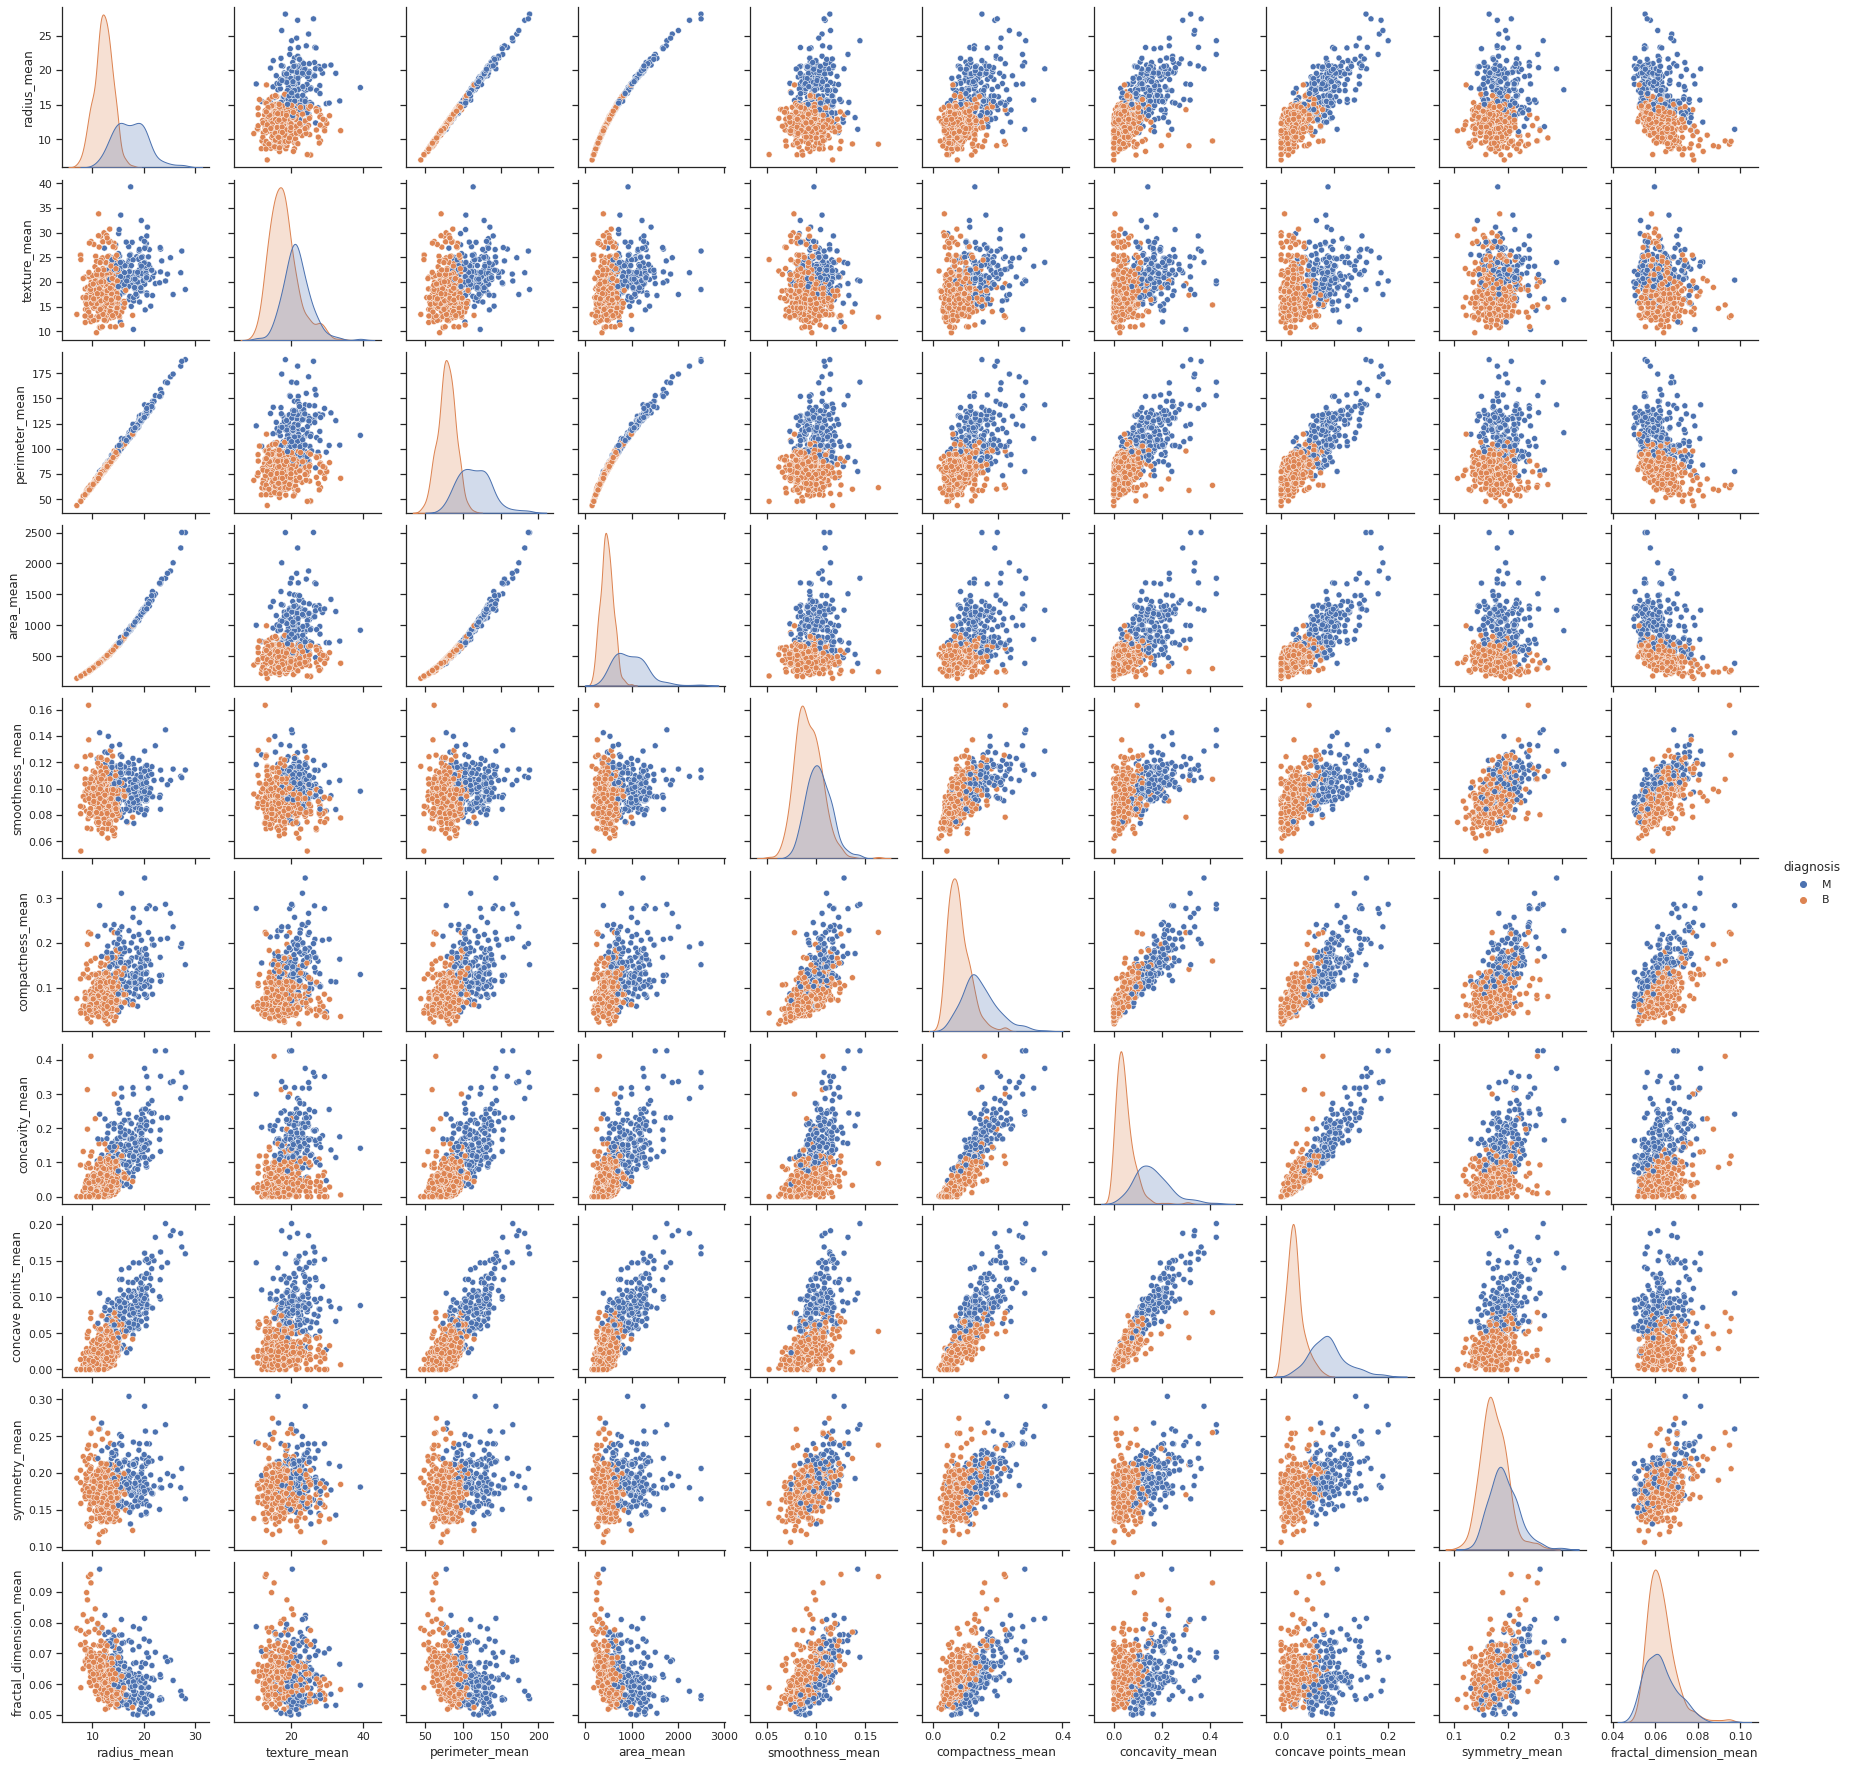

In [95]:
sns.pairplot(data, hue="diagnosis")

In [96]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [97]:
diagnosis = LabelEncoder()
code_diagnosis = diagnosis.fit_transform(data["diagnosis"])
data["diagnosis"] = code_diagnosis
data = data.astype({"diagnosis":"int64"})
np.unique(code_diagnosis)

array([0, 1])

In [98]:
data['diagnosis'].unique()

array([1, 0])

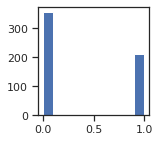

In [99]:
# Оценим дисбаланс классов для stroke
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(data['diagnosis'])
plt.show()

In [100]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [101]:
# посчитаем дисбаланс классов
total = data.shape[0]
class_0, class_1 = data['diagnosis'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 62.739999999999995%, а класс 1 составляет 37.26%.


Присутствует незначительный дисбаланс классов.

In [104]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    return features_upsampled, target_upsampled

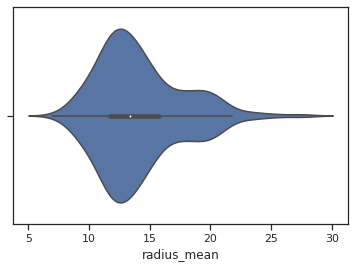

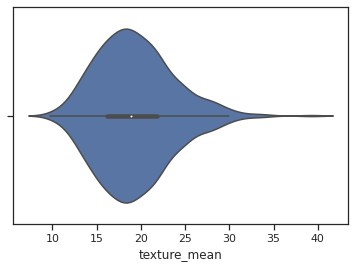

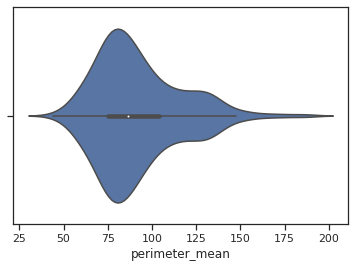

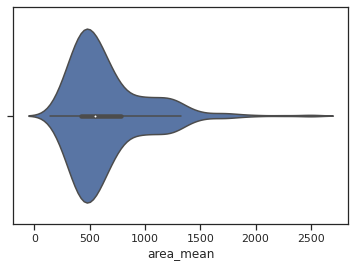

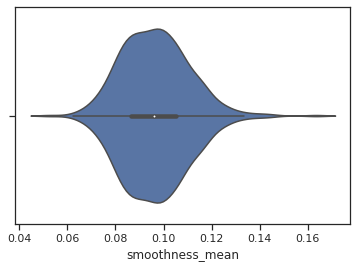

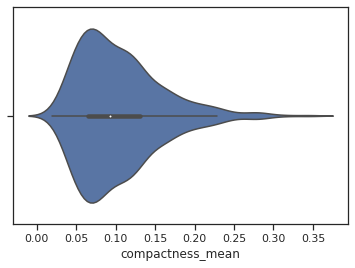

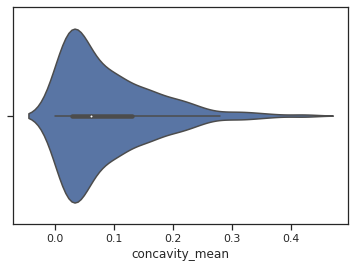

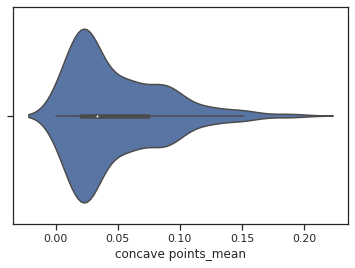

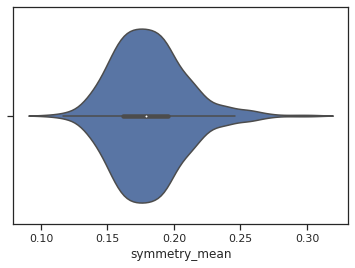

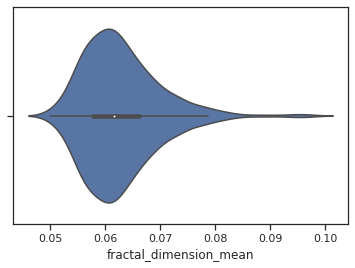

In [105]:
# Скрипичные диаграммы для числовых колонок
for col in ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']:
    sns.violinplot(x=data[col])
    plt.show()

# Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [106]:
data.dtypes

diagnosis                   int64
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

Категориальный признак "diagnosis" был закодирован ранее, другие категориальные признаки отсутствуют.

In [107]:
# Числовые колонки для масштабирования
scale_cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

In [108]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [109]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [110]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_mean_scaled  texture_mean_scaled  \
0         0.2419  ...            0.521037             0.022658   
1         0.1812  ...            0.643144             0.272574   
2         0.2069  ...            0.601496             0.390260   
3         0.2597  ...            0.210090             0.360839   
4         0.1809  ...            0.629893             0.156578   

   perimeter_mean_scaled  area_mean_scaled  smoothness_mean_scaled  \
0               0.545989          0.363733                0.593753   
1               0.615783          0.501591                0.289880   
2               0.595743          0.449417                0.514309   
3               0.233501          0.102906                0.811321   
4               0.630986          0.489290                0.430351   

   compactness_mean_scaled  concavity_mean_scaled  concave points_mean_scaled  \
0                 0.792037               0.703140                    0.731113   
1                 0.181768               0.203608                    0.348757   
2                 0.431017               0.462512                    0.635686   
3                 0.811361               0.565604                    0.522863   
4                 0.347893               0.463918                    0.518390   

   symmetry_mean_scaled  fractal_dimension_mean_scaled  
0              0.686364                       0.605518  
1              0.379798                       0.141323  
2              0.509596                       0.211247  
3              0.776263                       1.000000  
4              0.378283                       0.186816  

[5 rows x 21 columns]

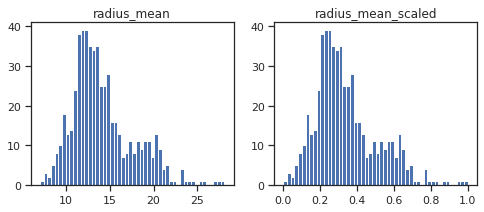

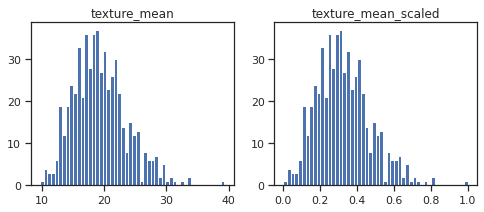

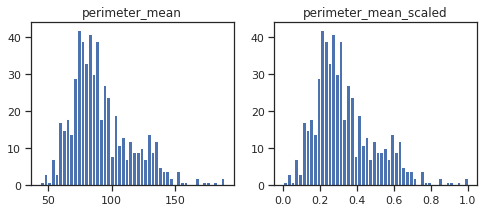

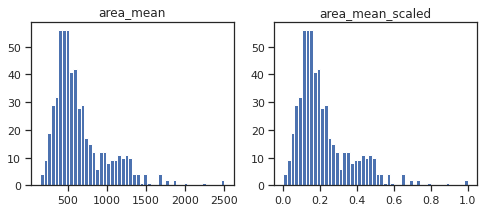

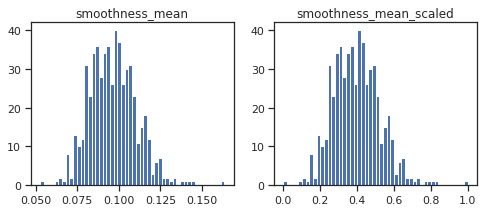

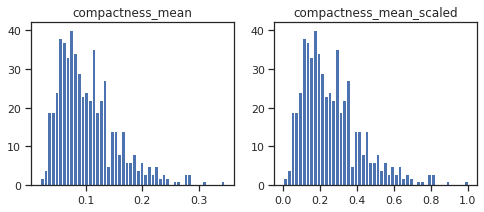

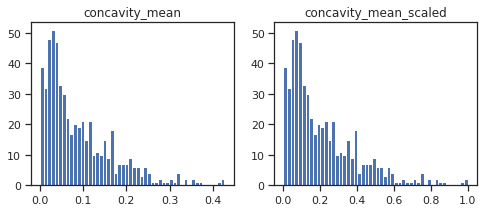

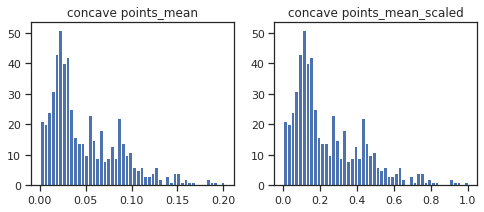

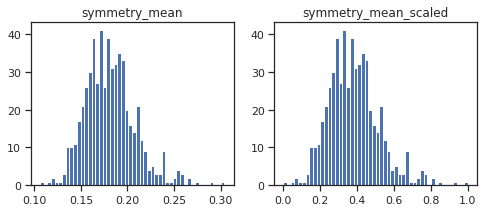

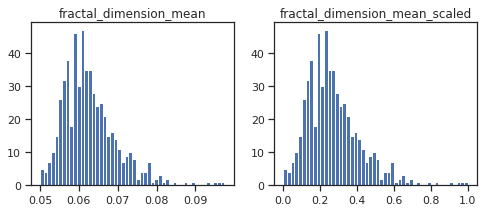

In [111]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

# Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [112]:
# Воспользуемся наличием тестовых выборок, 
# включив их в корреляционную матрицу
corr_cols_1 = scale_cols + ['diagnosis']
corr_cols_1

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'diagnosis']

In [113]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['diagnosis']
corr_cols_2

['radius_mean_scaled',
 'texture_mean_scaled',
 'perimeter_mean_scaled',
 'area_mean_scaled',
 'smoothness_mean_scaled',
 'compactness_mean_scaled',
 'concavity_mean_scaled',
 'concave points_mean_scaled',
 'symmetry_mean_scaled',
 'fractal_dimension_mean_scaled',
 'diagnosis']

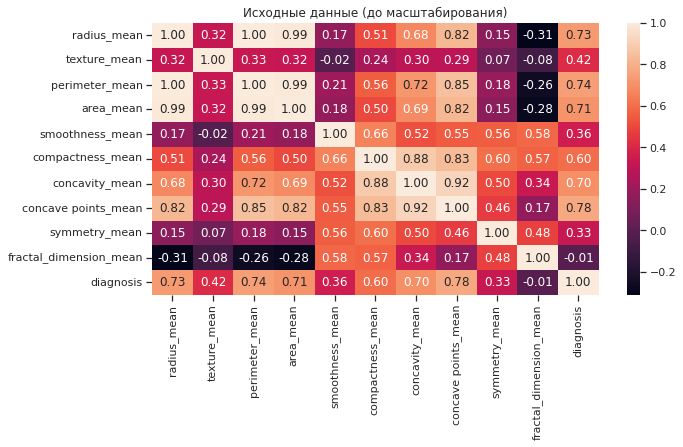

In [114]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

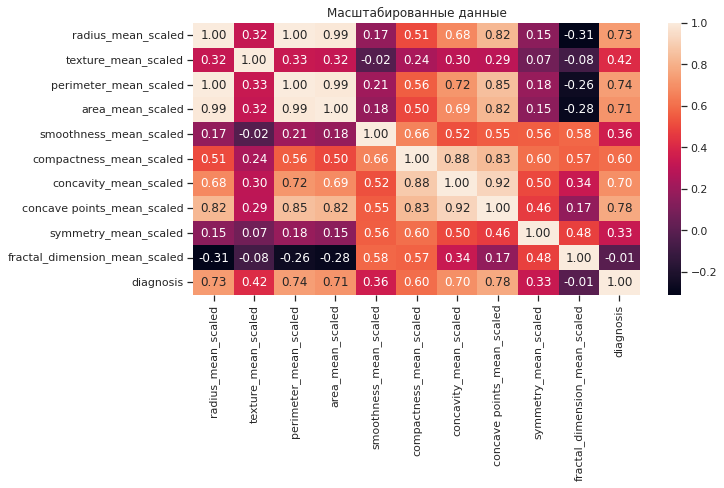

In [115]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

Корреляционные матрицы для исходных и масштабированных данных совпадают.

Целевой признак классификации "diagnosis" наиболее сильно коррелирует с radius_mean (0.73), perimeter_mean (0.74) и concave points_mean (0.78). Эти признаки обязательно следует оставить в модели классификации.

# Выбор метрик для последующей оценки качества моделей.

В качестве метрик для решения задачи классификации будем использовать:

Метрики, формируемые на основе матрицы ошибок:

Метрика precision: Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Метрика recall (полнота): Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Метрика F1-мера: Для того, чтобы объединить precision и recall в единую метрику используется Fβ-мера, которая вычисляется как среднее гармоническое от precision и recall:

Метрика ROC AUC:

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция roc_auc_score.

# Сохранение и визуализация метрик

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [116]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()  

# Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.

Для задачи классификации будем использовать следующие модели:

- Логистическая регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

# Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [117]:
X_train, X_test, y_train, y_test = train_test_split(data, data.diagnosis, random_state=1)

In [118]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 21), (426,), (143, 21), (143,))

# Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [119]:
# Модели
clas_models = {'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(probability=True),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [120]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [121]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [122]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(X_train, y_train)
    # Предсказание значений
    Y_pred = model.predict(X_test)
    # Предсказание вероятности класса "1" для roc auc
    Y_pred_proba_temp = model.predict_proba(X_test)
    Y_pred_proba = Y_pred_proba_temp[:,1]
    
    precision = precision_score(y_test.values, Y_pred)
    recall = recall_score(y_test.values, Y_pred)
    f1 = f1_score(y_test.values, Y_pred)
    roc_auc = roc_auc_score(y_test.values, Y_pred_proba)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))    
    draw_roc_curve(y_test.values, Y_pred_proba, ax[0])
    plot_confusion_matrix(model, X_test, y_test.values, ax=ax[1],
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    fig.suptitle(model_name)
    plt.show()

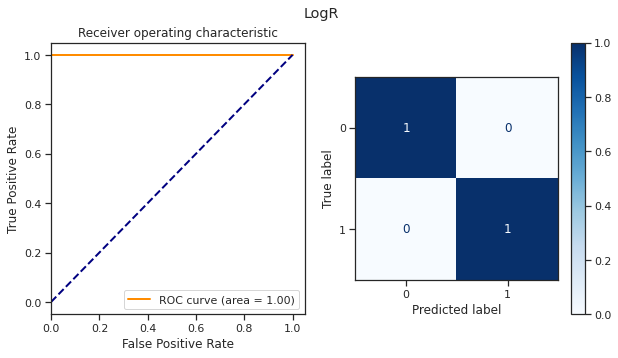

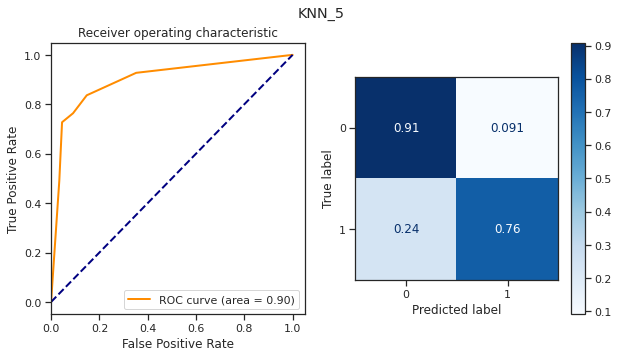

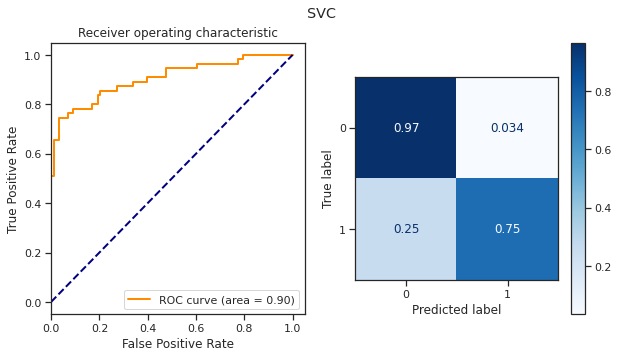

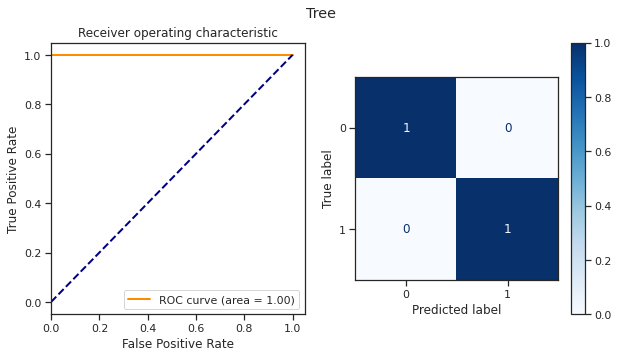

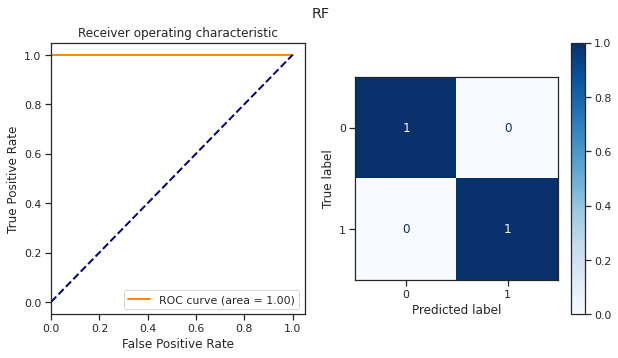

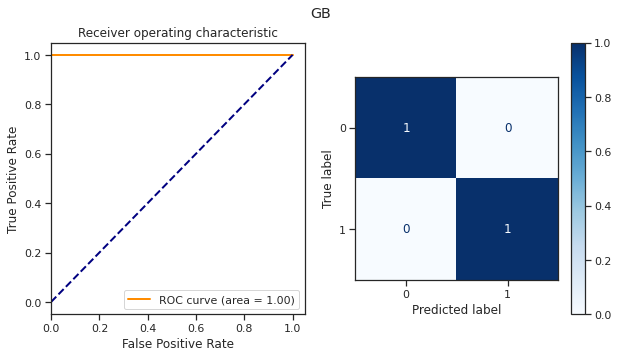

In [123]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

# Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [124]:
X_train.shape

(426, 21)

In [125]:
n_range_list = list(range(0,1250,50))
n_range_list[0] = 1

In [126]:
n_range = np.array(n_range_list)
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([   1,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
          550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
         1100, 1150, 1200])}]

In [127]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(X_train, y_train)

CPU times: user 1.44 s, sys: 2.54 s, total: 3.98 s
Wall time: 522 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([   1,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
       1100, 1150, 1200])}],
             scoring='roc_auc')

In [128]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=200)

In [129]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 200}

In [130]:
clf_gs_best_params_txt = str(clf_gs.best_params_['n_neighbors'])
clf_gs_best_params_txt

'200'

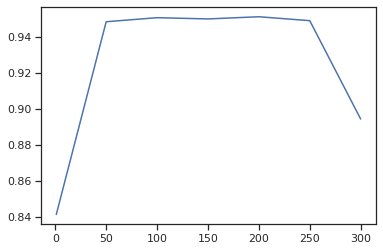

In [131]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

# Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [132]:
clas_models_grid = {'KNN_5':KNeighborsClassifier(n_neighbors=5), 
                    str('KNN_' + clf_gs_best_params_txt):clf_gs.best_estimator_}

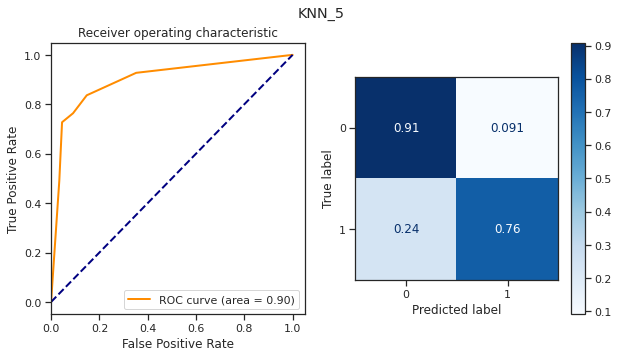

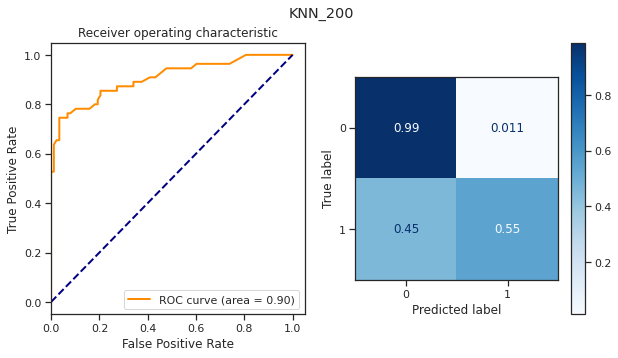

In [133]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

# Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

In [134]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

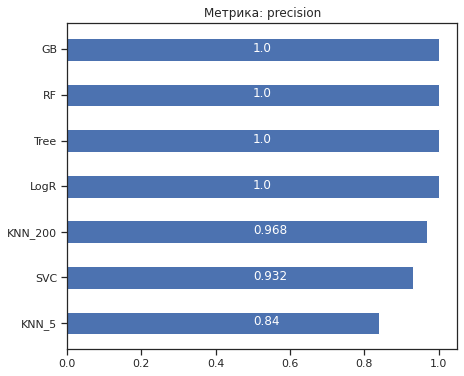

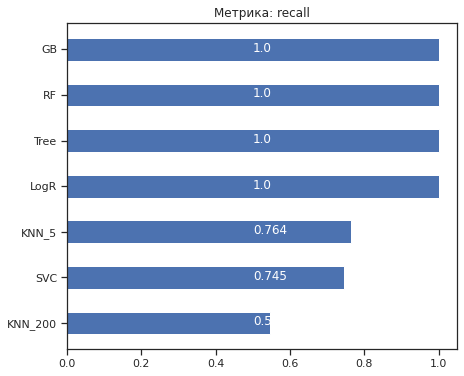

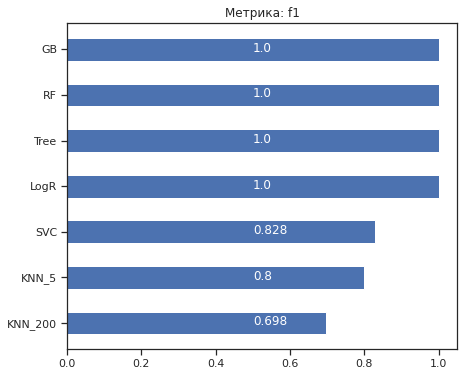

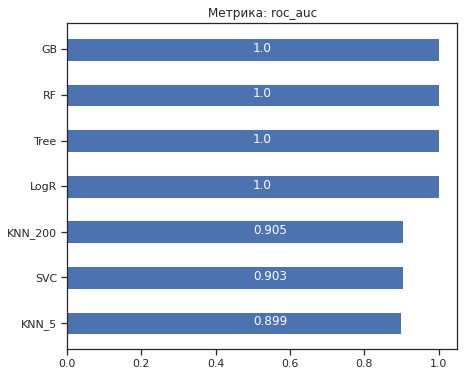

In [135]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

Вывод: 
Исходя из приведенных метрик, видим, что 4 модели: градиентный бустинг, дерево, логистическая регрессия и случайный лес показывают одинаково высокий результат.